# Introducción 
El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.

Te han dado una base de datos de uno de los servicios que compiten en este mercado. Contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Esta información se utilizará para generar una propuesta de valor para un nuevo producto.

# Instrucciones para completar la tarea 
- Describe los objetivos del estudio.
- Estudia las tablas (imprime las primeras filas).
- Realiza una consulta SQL para cada una de las tareas.
- Genera los resultados de cada consulta en el Notebook.
- Describe tus conclusiones para cada una de las tareas.

## Notas 
- !No te olvides de las funciones! Pueden facilitar considerablemente tu vida y la ejecución de consultas.
- Tus resultados deben ser obtenidos con SQL. Usa pandas solamente para imprimir y almacenar los resultados de la consulta.

# Ejercicios a realizar 
- Encuentra el número de libros publicados después del 1 de enero de 2000.
- Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.
- Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).
- Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.
- Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

# Importar librerías 

In [1]:
import pandas as pd # Librería para trabajar con los datos 
from sqlalchemy import create_engine # Librería para conectarse a la base de datos

import dotenv
dotenv.load_dotenv()

import os

# Conectarse a la base de datos 


In [2]:
db_config = {'user': os.getenv('user'),         # nombre de usuario
             'pwd': os.getenv('pwd'), # contraseña
             'host': os.getenv('host'),
             'port': os.getenv('port'),              # puerto de conexión
             'db': os.getenv('db')}          # nombre de la base de datos

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# Descripción de los datos 
`**books**`

Contiene datos sobre libros:

- `book_id`: identificación del libro
- `author_id`: identificación del autor o autora
- `title`: título
- `num_pages`: número de páginas
- `publication_date`: fecha de la publicación
- `publisher_id`: identificación de la editorial

`**authors**`

Contiene datos sobre autores:

- `author_id`: identificación del autor o autora
- `author`: el autor o la autora

`**publishers**`

Contiene datos sobre editoriales:

- `publisher_id`: identificación de la editorial
- `publisher`: la editorial

`**ratings**`

Contiene datos sobre las calificaciones de usuarios:

- `rating_id`: identificación de la calificación
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `rating`: calificación

`**reviews**`

Contiene datos sobre las reseñas de los y las clientes:

- `review_id`: identificación de la reseña
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `text`: el texto de la reseña


## Diagrama de datos 
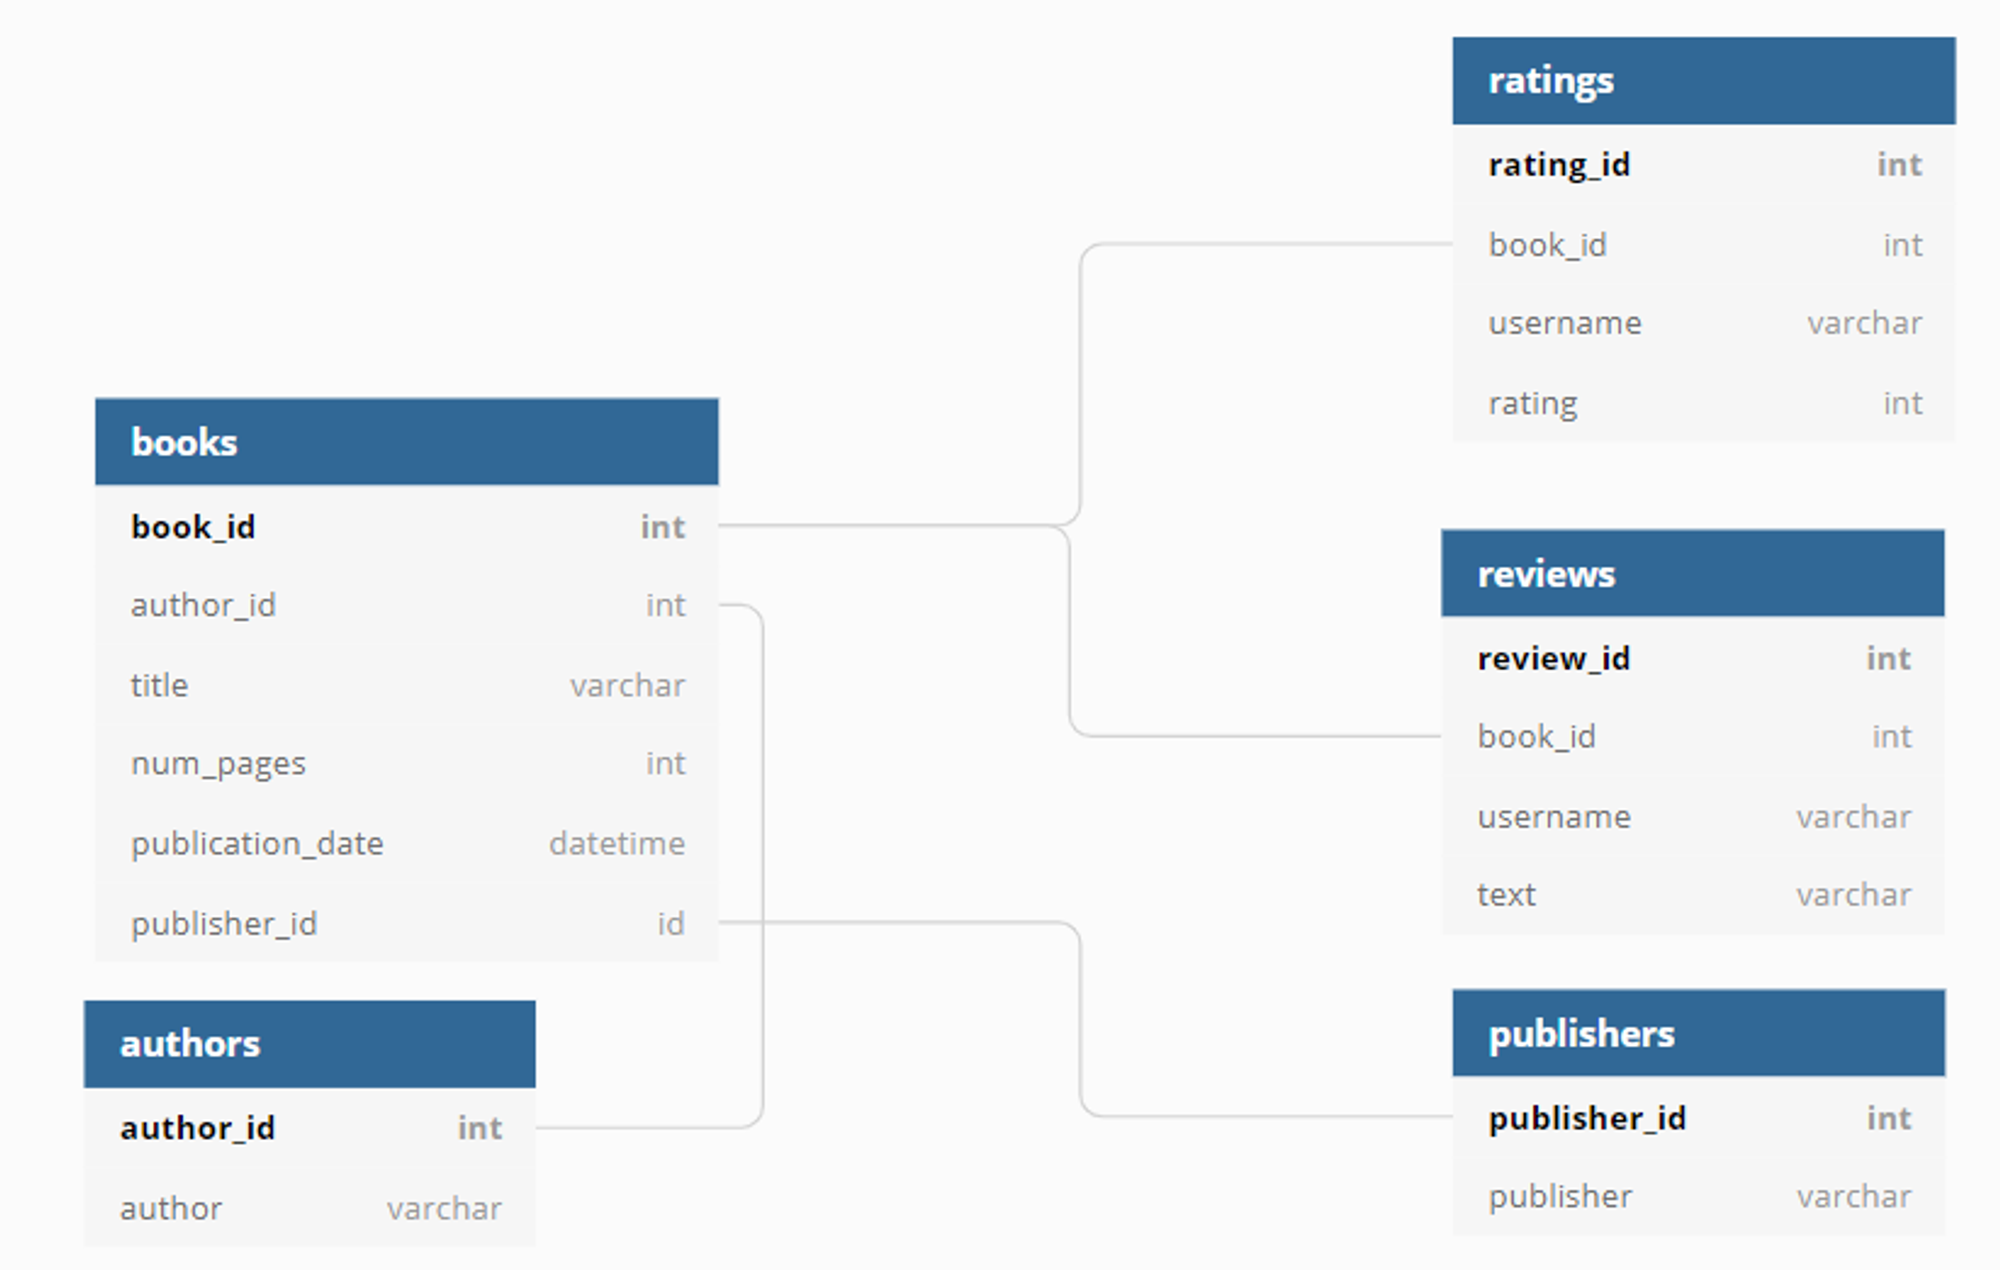

## Books

In [3]:
query_1 = 'SELECT * FROM books'
books = pd.io.sql.read_sql(query_1, con = engine)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


## Authors 


In [4]:
query_2 = 'SELECT * FROM authors'
authors = pd.io.sql.read_sql(query_2, con = engine)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


## Ratings 

In [5]:
query_3 = 'SELECT * FROM ratings'
ratings = pd.io.sql.read_sql(query_3, con = engine)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


## Reviews 

In [6]:
query_4 = 'SELECT * FROM reviews'
reviews = pd.io.sql.read_sql(query_4, con = engine)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Publishers 

In [7]:
query_5 = 'SELECT * FROM publishers'
publishers = pd.io.sql.read_sql(query_5, con = engine)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


# Ejercicios a realizar 


## Encuentra el número de libros publicados después del 1 de enero de 2000.

In [8]:
query_6 = '''
SELECT COUNT(*) AS number_of_books
FROM books
WHERE publication_date > '2000-01-01'
'''  

books_count = pd.io.sql.read_sql(query_6, con = engine)
books_count

,number_of_books
0,819


Desde el 1 de enero de 2000, se han publicado un total de 819 libros. Este número refleja una actividad considerable en la publicación de libros en las últimas décadas, lo que puede ser indicativo de un mercado activo y en crecimiento para los lectores contemporáneos. La tendencia de publicación reciente es crucial para las startups en el ámbito de aplicaciones para amantes de los libros, ya que indica una amplia oferta de contenido moderno que puede ser atractivo para los usuarios.

## Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.

In [16]:
query_7 = '''
SELECT
    b.book_id,
    b.title,
    COUNT(rw.review_id) AS number_of_reviews,
    AVG(rt.rating) AS average_rating
FROM
    books b
LEFT JOIN
    reviews rw ON b.book_id = rw.book_id
LEFT JOIN
    ratings rt ON b.book_id = rt.book_id
GROUP BY
    b.book_id, b.title
ORDER BY
    number_of_reviews DESC;
'''
mean_ratings = pd.io.sql.read_sql(query_7, con = engine)
mean_ratings.head(15)

,book_id,title,number_of_reviews,average_rating
0,948,Twilight (Twilight #1),1120,3.662500
1,750,The Hobbit or There and Back Again,528,4.125000
2,673,The Catcher in the Rye,516,3.825581
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,492,4.414634
4,299,Harry Potter and the Chamber of Secrets (Harry...,480,4.287500
5,75,Angels & Demons (Robert Langdon #1),420,3.678571
6,301,Harry Potter and the Order of the Phoenix (Har...,375,4.186667
7,779,The Lightning Thief (Percy Jackson and the Oly...,372,4.080645
8,79,Animal Farm,370,3.729730
9,722,The Fellowship of the Ring (The Lord of the Ri...,370,4.391892


Los datos muestran que "Twilight (Twilight #1)" tiene el mayor número de reseñas de usuarios con 1120 reseñas, pero su calificación promedio es de 3.6625, lo que indica una recepción mixta. En contraste, los libros de la serie "Harry Potter" no solo tienen un alto número de reseñas, sino que también presentan calificaciones promedio elevadas, destacándose "Harry Potter and the Prisoner of Azkaban" con una calificación promedio de 4.4146.

Esta combinación de alto número de reseñas y calificaciones positivas sugiere una fuerte aceptación y satisfacción del usuario, lo que podría indicar un público fiel y entusiasta. Esto es valioso para las startups, ya que puede orientar las estrategias de desarrollo de productos, enfocándose en géneros o autores que generan más interacción y satisfacción entre los usuarios.

El análisis de la calificación promedio y el número de reseñas también muestra que los libros con más reseñas tienden a pertenecer a series populares o autores reconocidos, lo cual puede ser un factor importante a considerar al desarrollar nuevas aplicaciones de recomendación de libros. Integrar algoritmos que prioricen libros con alta participación y calificaciones positivas puede mejorar la experiencia del usuario y fomentar el uso continuo de la aplicación.

## Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas.

In [10]:
query_8 = '''
SELECT
    p.publisher,
    COUNT(b.book_id) AS number_of_books
FROM
    books b
JOIN
    publishers p ON b.publisher_id = p.publisher_id
WHERE
    b.num_pages > 50
GROUP BY
    p.publisher
ORDER BY
    number_of_books DESC
LIMIT 1;
'''
publisher_50 = pd.io.sql.read_sql(query_8, con = engine)
publisher_50

,publisher,number_of_books
0,Penguin Books,42


Penguin Books es la editorial que ha publicado la mayor cantidad de libros (42) con más de 50 páginas. Este hallazgo subraya el papel prominente de Penguin Books en la industria editorial, destacándola como una fuente clave de contenido sustancial y relevante para los lectores.

Para las startups en el mercado de aplicaciones para amantes de los libros, esta información es valiosa para varias razones:

Colaboraciones y Acuerdos: Identificar a Penguin Books como un socio potencial para colaboraciones, acuerdos de licencia y promociones cruzadas puede ser una estrategia eficaz. Teniendo en cuenta su gran volumen de publicaciones, un acuerdo con Penguin Books podría enriquecer significativamente el catálogo de la aplicación.

Curación de Contenidos: Dado que Penguin Books tiene una notable cantidad de títulos populares y bien establecidos, incluir una sección destacada de libros publicados por Penguin podría atraer a una base de usuarios más amplia y mejorar la percepción de calidad de la aplicación.

Recomendaciones de Libros: Integrar algoritmos que prioricen las publicaciones de Penguin Books en las recomendaciones puede aumentar la satisfacción del usuario, ya que están recurriendo a una editorial conocida por su calidad y diversidad en géneros.

## Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.

In [11]:
query_9 = '''
WITH book_ratings AS (
    SELECT
        b.book_id,
        b.author_id,
        AVG(r.rating) AS average_rating,
        COUNT(r.rating_id) AS rating_count
    FROM
        books b
    JOIN
        ratings r ON b.book_id = r.book_id
    GROUP BY
        b.book_id
    HAVING
        COUNT(r.rating_id) >= 50
),
author_avg_ratings AS (
    SELECT
        br.author_id,
        AVG(br.average_rating) AS author_average_rating
    FROM
        book_ratings br
    GROUP BY
        br.author_id
)
SELECT
    a.author,
    aar.author_average_rating
FROM
    authors a
JOIN
    author_avg_ratings aar ON a.author_id = aar.author_id
ORDER BY
    aar.author_average_rating DESC
LIMIT 1;
'''

author_50 = pd.io.sql.read_sql(query_9, con = engine)
author_50

,author,author_average_rating
0,J.K. Rowling/Mary GrandPré,4.283844


J.K. Rowling, junto con la ilustradora Mary GrandPré, tiene la calificación promedio más alta (4.283844) entre los autores con libros que han recibido al menos 50 calificaciones. Este resultado destaca la popularidad y la alta satisfacción de los lectores con las obras de J.K. Rowling, específicamente la serie de Harry Potter, que es una de las más exitosas y queridas globalmente.

Para las startups en el ámbito de las aplicaciones de libros, este hallazgo presenta varias oportunidades estratégicas:

Contenido Destacado: Resaltar los libros de J.K. Rowling en la aplicación puede atraer a un gran número de usuarios, dada la popularidad y alta calificación de sus libros. Se pueden crear secciones especiales dedicadas a sus obras, como "Lo mejor de J.K. Rowling" o "Favoritos de Harry Potter".

Promociones y Campañas de Marketing: Aprovechar la alta calificación promedio de J.K. Rowling para campañas de marketing puede ser muy efectivo. Por ejemplo, promociones temáticas, eventos de lectura, o concursos basados en el universo de Harry Potter pueden aumentar la participación y retención de los usuarios.

Recomendaciones Personalizadas: Integrar algoritmos que prioricen las obras de J.K. Rowling en las recomendaciones para nuevos usuarios o para aquellos que muestran interés en fantasía y literatura juvenil podría mejorar la experiencia del usuario y su satisfacción con la aplicación.

Ediciones Especiales y Contenidos Adicionales: Ofrecer ediciones especiales, análisis detallados, trivias, y otros contenidos adicionales relacionados con los libros de J.K. Rowling podría aumentar el valor percibido de la aplicación y fomentar una comunidad activa de lectores.

En resumen, la alta calificación promedio de J.K. Rowling/Mary GrandPré no solo subraya la calidad y la aceptación de sus obras, sino que también ofrece múltiples vías para que las startups capitalicen esta popularidad en sus estrategias de desarrollo de productos y marketing.

## Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

In [12]:
query_10 = '''
WITH users_with_many_ratings AS (
    SELECT
        username,
        COUNT(rating_id) AS rating_count
    FROM
        ratings
    GROUP BY
        username
    HAVING
        COUNT(rating_id) > 50
),
text_reviews_count AS (
    SELECT
        rw.username,
        COUNT(rw.review_id) AS text_review_count
    FROM
        reviews rw
    JOIN
        users_with_many_ratings ur ON rw.username = ur.username
    GROUP BY
        rw.username
)
SELECT
    AVG(trc.text_review_count) AS average_text_reviews
FROM
    text_reviews_count trc;
'''

mean_text_reviews = pd.io.sql.read_sql(query_10, con = engine)
mean_text_reviews

,average_text_reviews
0,24.333333


El promedio de 24.33 reseñas de texto entre los usuarios que han calificado más de 50 libros indica un alto nivel de compromiso y participación entre los lectores más activos. Este nivel de interacción es un indicio de una comunidad de usuarios apasionados y dedicados, lo que puede ser muy beneficioso para las startups que buscan lanzar o mejorar aplicaciones de libros.

Para las startups, este hallazgo ofrece varias oportunidades estratégicas:

Fomentar la Comunidad: La presencia de usuarios altamente activos sugiere que existe una base sólida sobre la cual construir una comunidad vibrante. Se pueden implementar características que fomenten la interacción entre usuarios, como foros de discusión, clubes de lectura virtuales y eventos de reseñas en vivo.

Incentivos para Reseñas: Ofrecer incentivos para la escritura de reseñas, tales como puntos de fidelidad, acceso a contenido exclusivo o premios, puede aumentar aún más el número de reseñas de texto y la calidad del contenido generado por los usuarios.

Contenido Generado por Usuarios: Aprovechar las reseñas de texto para mejorar las recomendaciones y la personalización dentro de la aplicación. Las reseñas detalladas pueden proporcionar insights valiosos sobre las preferencias de los usuarios, permitiendo una mejor segmentación y personalización de las recomendaciones de libros.

Destacar Reseñas de Calidad: Implementar un sistema para destacar las mejores reseñas de texto, similar a "reseñas destacadas" o "reseñas útiles", puede mejorar la calidad del contenido visible para todos los usuarios y servir como guía para nuevos lectores.

Feedback y Mejora Continua: Utilizar las reseñas de texto como una fuente de feedback continuo para identificar áreas de mejora en la experiencia del usuario y en la oferta de contenido de la aplicación. Las reseñas detalladas pueden revelar tendencias, problemas recurrentes o demandas específicas de los usuarios más comprometidos.

En resumen, el alto promedio de reseñas de texto entre los usuarios más activos es una señal positiva de un alto nivel de compromiso y puede ser aprovechado para fomentar una comunidad activa y leal, mejorar la personalización de la aplicación y crear un ecosistema de retroalimentación continua para la mejora del producto.

# Conclusion General 
El análisis de datos realizado sobre la base de datos de uno de los servicios competidores en el mercado de aplicaciones para amantes de los libros ha proporcionado valiosas percepciones que pueden guiar el desarrollo de una propuesta de valor robusta para un nuevo producto. A continuación, se resumen los hallazgos clave y sus implicaciones estratégicas:

Publicaciones Recientes:

Se han publicado 819 libros después del 1 de enero de 2000, indicando una rica oferta de contenido reciente y relevante. Esto sugiere un mercado activo con una demanda sostenida por nuevas publicaciones, lo cual es crucial para atraer a los usuarios que buscan novedades y contenido contemporáneo.

Reseñas y Calificaciones:

Los datos muestran que ciertos libros, como "Twilight (Twilight #1)" y la serie de "Harry Potter", tienen un gran número de reseñas, con las obras de J.K. Rowling destacando tanto en cantidad como en calidad de calificaciones. Este patrón sugiere que los usuarios están altamente comprometidos con series populares y autores reconocidos.
La implementación de algoritmos de recomendación que prioricen libros con alta participación y calificaciones positivas puede mejorar significativamente la experiencia del usuario.

Editorial Destacada:

Penguin Books ha publicado 42 libros con más de 50 páginas, destacándola como una editorial líder. Este hallazgo subraya la importancia de asociarse con editoriales reconocidas para enriquecer el catálogo y atraer a los usuarios con títulos de calidad.

Autor con Alta Calificación:

J.K. Rowling, con una calificación promedio de 4.283844, destaca como una autora de alta satisfacción entre los lectores. Resaltar sus obras y crear contenido especial alrededor de sus libros puede atraer a un público amplio y entusiasta, mejorando la retención de usuarios.

Reseñas de Texto por Usuarios Activos:

El promedio de 24.33 reseñas de texto entre los usuarios más activos indica un alto nivel de compromiso. Esto sugiere una comunidad de lectores apasionados que puede ser fomentada y aprovechada para generar contenido de calidad y mejorar la personalización de las recomendaciones dentro de la aplicación.

Implicaciones Estratégicas
Basado en los resultados del análisis, se pueden delinear varias estrategias clave para el desarrollo del nuevo producto:

Enriquecer el Catálogo:

Fomentar asociaciones con editoriales prominentes como Penguin Books para asegurar una oferta diversa y de alta calidad de títulos.

Optimizar Algoritmos de Recomendación:

Desarrollar algoritmos que prioricen libros con alta participación y calificaciones positivas para mejorar la relevancia y satisfacción de las recomendaciones.

Fomentar la Comunidad de Lectores:

Implementar características que incentiven la interacción entre usuarios, tales como foros, clubes de lectura virtuales y eventos especiales.

Incentivar Reseñas de Calidad:

Ofrecer recompensas y destacar las mejores reseñas de texto para aumentar el contenido generado por los usuarios y mejorar la experiencia general.

Marketing y Promociones:

Aprovechar la popularidad de autores como J.K. Rowling para campañas de marketing, promociones temáticas y eventos especiales que atraigan y retengan a los usuarios.

Conclusión Final

El análisis detallado de la base de datos ha revelado patrones y tendencias importantes que pueden ser aprovechados para crear una aplicación de libros atractiva y competitiva. Con un enfoque en ofrecer contenido relevante, personalizar las recomendaciones y fomentar una comunidad activa de lectores, la nueva aplicación tiene el potencial de destacarse en el mercado y satisfacer las necesidades de un público amplio y variado.